# Posterior Approximation for a Gaussian model

Posterior distribution of a Gaussian model:
$$P(\theta | y) \propto P(\theta_1, \theta_2 | y) p(\theta_1,\theta_2)= \frac{exp(\frac{\theta_1}{\theta_2}t_1(y) - \frac{t_2(y)}{2\theta_2}}{C(\theta_1, \theta_2)} p(\theta_1,\theta_2)$$
Where:
the $y$ is the observation

$t(y)=[t_1(y), t_2(y)]$ the vector of sufficient statistics: $t_1(y) = \sum_i^m y_i$ and $t_2(y) = \sum_i^m y_i^2$

$\theta = [\theta_1, \theta_2]$ the parameters: $\theta_1$ is **the mean** $\theta_2$ **the variance** ($var = \sigma^2$)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json

In [75]:
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    mean = [d[0] for d in data]
    var = [d[1] for d in data]
    data_frame = pd.DataFrame({'mean': mean, 'var': var})
    return data_frame

def sample(df, by):
    data_frame = pd.DataFrame({'mean': [mean[1] for mean in data2['mean'].items() if mean[0] % 10 == 0], 
                               'var': [var[1] for var in data2['var'].items() if var[0] % 10 == 0]})
    return data_frame

### First result
* sample size : $size=1000$
* $theta_prior = [10,10]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.025]$
* Number of samples: $n=1000$
* Shadow chain length: $n_{shadow} = 100$

In [29]:
FILE_NAME_1 = 'assets/exp1.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


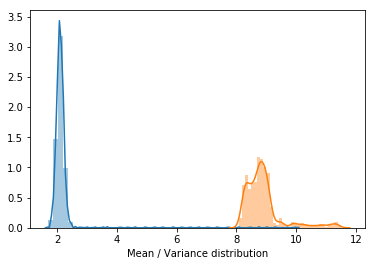

In [45]:
data1 = extract_from_file(FILE_NAME_1)
sns.distplot(data1['mean'])
sns.distplot(data1['var'], axlabel="Mean / Variance distribution")

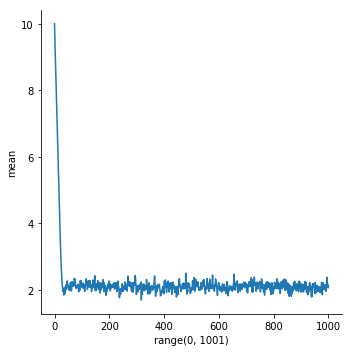

In [39]:
sns.relplot(x=range(len(data1['mean'])),y='mean', data=data1, kind='line', legend='brief')

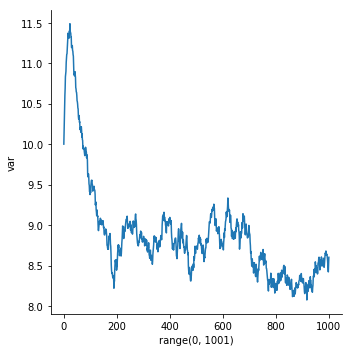

In [40]:
sns.relplot(x=range(len(data1['var'])),y='var', data=data1, kind='line', legend='brief')

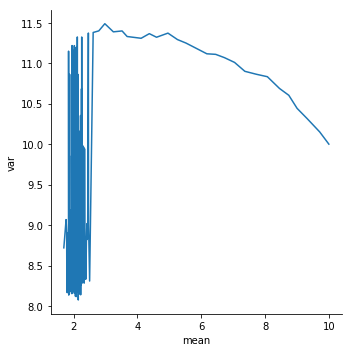

In [41]:
sns.relplot(x='mean',y='var', data=data1, kind='line', legend='brief')

### Second result
* sample size : $size=1000$
* $theta_prior = [10,10]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.05]$
* Number of samples: $n=10 000$
* Shadow chain length: $n_{shadow} = 100$

In [47]:
FILE_NAME_2 = 'assets/exp2.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


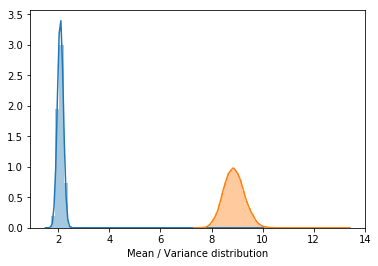

In [48]:
data2 = extract_from_file(FILE_NAME_2)
sns.distplot(data2['mean'])
sns.distplot(data2['var'], axlabel="Mean / Variance distribution")

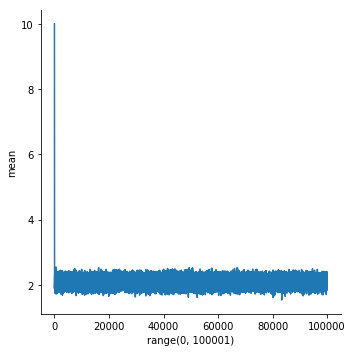

In [49]:
sns.relplot(x=range(len(data2['mean'])),y='mean', data=data2, kind='line', legend='brief')

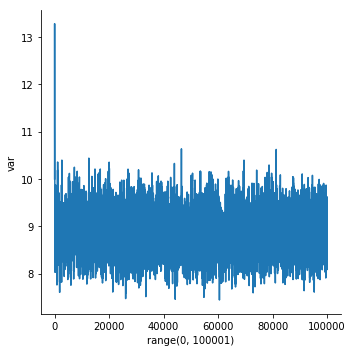

In [50]:
sns.relplot(x=range(len(data2['var'])),y='var', data=data2, kind='line', legend='brief')

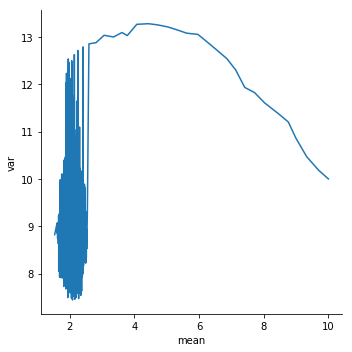

In [71]:
sns.relplot(x='mean',y='var', data=data2, kind='line', legend='brief')

In [77]:
data2_100 = sample(data2, 10)

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


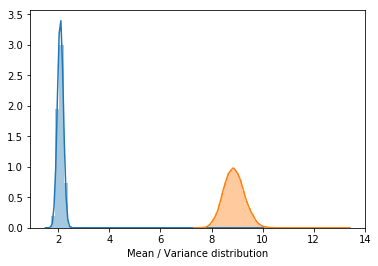

In [85]:
sns.distplot(data2['mean'])
sns.distplot(data2['var'], axlabel="Mean / Variance distribution")

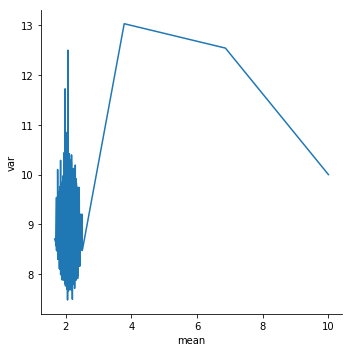

In [84]:
sns.relplot(x='mean',y='var', data=data2_100, kind='line', legend='brief')

### Third result
* sample size : $size=1000$
* $theta_prior = [10,10]$
* $y \sim N(\mu = 2, \sigma = 3)$
* $\Delta=[0.05, 0.05]$
* Number of samples: $n=10 000$
* Shadow chain length: $n_{shadow} = 500$

In [87]:
FILE_NAME_3 = 'assets/exp3.json'

/Users/quentin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


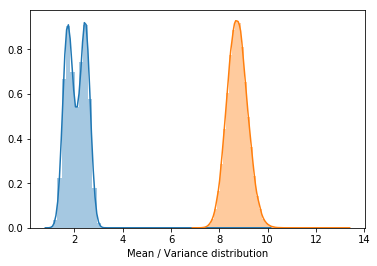

In [89]:
data3 = extract_from_file(FILE_NAME_3)
sns.distplot(data3['mean'])
sns.distplot(data3['var'], axlabel="Mean / Variance distribution")

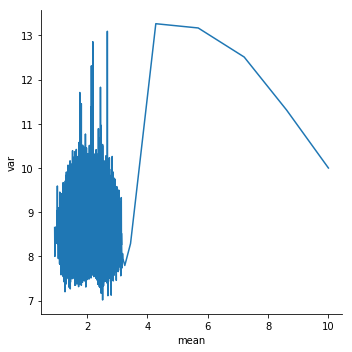

In [90]:
sns.relplot(x='mean',y='var', data=data3, kind='line', legend='brief')